<a href="https://colab.research.google.com/github/mafer-saes01/Proyecto_ASE/blob/main/ProyectoASE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROYECTO ASE: Análisis de Desapariciones de Mujeres en Jalisco** 

In [ ]:
#Nombre: María Fernanda Saavedra Espinosa
#Asesor: Lázaro Bustio Martinez
#Fecha de entrega: 18/09/2022
#Breve descripción: El siguiente programa de python realiza un analisis de la base
#de datos del gobierno mexicano "RNPEDFC" para encontrar la relación que hay entre
#las desapariciones que han sucedido en México durante 50 años (1968-2018).
#Esto se logra a través de la limpieza y análisis de datos para finalmente
#crear grupos de personas que desaparecieron con las mismas características.

In [ ]:
!pip install kneed #Se instala la biblioteca kneed para poder realizar el método del codo 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Se importan las bibliotecas necesarias para el proyecto

#Bibliotecas básicas
import io
import pandas as pd
import numpy as np
import math

#Bibliotecas para graficar
import seaborn as sns #Para hacer gráficas
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits import mplot3d
from ipywidgets import interact

#Bibliotecas para el manejo de datos de horas y tiempos
from datetime import timedelta
import datetime

#Bibliotecas para realizar el clustering y agrupamiento
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

In [ ]:
#Se importa el dataset
from google.colab import files
uploaded=files.upload()

Saving RNPEDFC.csv to RNPEDFC.csv


In [ ]:
#Se realiza el dataframe con el dataset
desapariciones_df=pd.read_csv(io.BytesIO(uploaded["RNPEDFC.csv"]), index_col=0, encoding='latin-1')
desapariciones_df

,Fecha,Hora,Pais,Entidad,Municipio,Localidad,Nacionalidad,Estatura,Complexion,Sexo,Edad,Descripcion de senas particulares,Etnia,Discapacidad,Dependencia que envio la informacion
1,18/03/2012,05:00:00,MEXICO,SONORA,NAVOJOA,NAVOJOA,MEXICANA,1.1,DELGADA,MUJER,7,TIENE UNA CICATRIZ EN LA RODILLA IZQUIERDA POR...,NO ESPECIFICADO,NINGUNO,FGE - SONORA
2,05/02/2007,02:00:26,MEXICO,ESTADO DE MEXICO,VALLE DE BRAVO,VALLE DE BRAVO,MEXICANA,1.1,DELGADA,MUJER,4,NO ESPECIFICADO,NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO
3,14/03/2009,08:30:54,MEXICO,ESTADO DE MEXICO,CHALCO,CHALCO,MEXICANA,1.1,DELGADA,HOMBRE,6,"MANCHAS, PARTE SUPERIOR DE PIERNA DERECHA, CIC...",NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO
4,23/12/2006,08:00:28,MEXICO,ESTADO DE MEXICO,TLALNEPANTLA DE BAZ,TLALNEPANTLA DE BAZ,MEXICANA,1.1,DELGADA,HOMBRE,10,"LUNARES, A LA ALTURA DE LA CINTURAFORMA DE MAN...",NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO
5,11/01/2008,12:00:17,MEXICO,ESTADO DE MEXICO,TOLUCA,TOLUCA,MEXICANA,1.1,DELGADA,HOMBRE,4,NO ESPECIFICADO,NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36261,26/04/2018,08:00:00,MEXICO,PUEBLA,PUEBLA,PUEBLA,MEXICANA,1.6,DELGADA,HOMBRE,22,LUNAR EN LA MEJILLA Y TATUAJE EN EL CUELLO EN ...,NO ESPECIFICADO,NINGUNO,FGE - PUEBLA
36262,08/01/2018,11:00:00,MEXICO,COLIMA,VILLA DE ALVAREZ,VILLA DE ALVAREZ,MEXICANA,1.7,ROBUSTA,MUJER,27,"EL OJO IZQUIERDO TIENE UN ENFERMEDAD COMO TIC,...",NO ESPECIFICADO,NINGUNO,PGJ - COLIMA
36263,02/02/2015,07:00:00,MEXICO,PUEBLA,CHILA,CHILAS DE LAS FLORES,MEXICANA,1.77,MEDIANA,MUJER,86,NO ESPECIFICADO,NO ESPECIFICADO,NINGUNO,FGE - PUEBLA
36264,22/08/2017,04:00:00,MEXICO,COLIMA,VILLA DE ALVAREZ,VILLA DE ALVAREZ,MEXICANA,1.76,ROBUSTA,HOMBRE,41,TATUAJE EN EL BRAZO IZQUIERDO CON LA IMAGEN DE...,NO ESPECIFICADO,NINGUNO,PGJ - COLIMA


# Contexto 

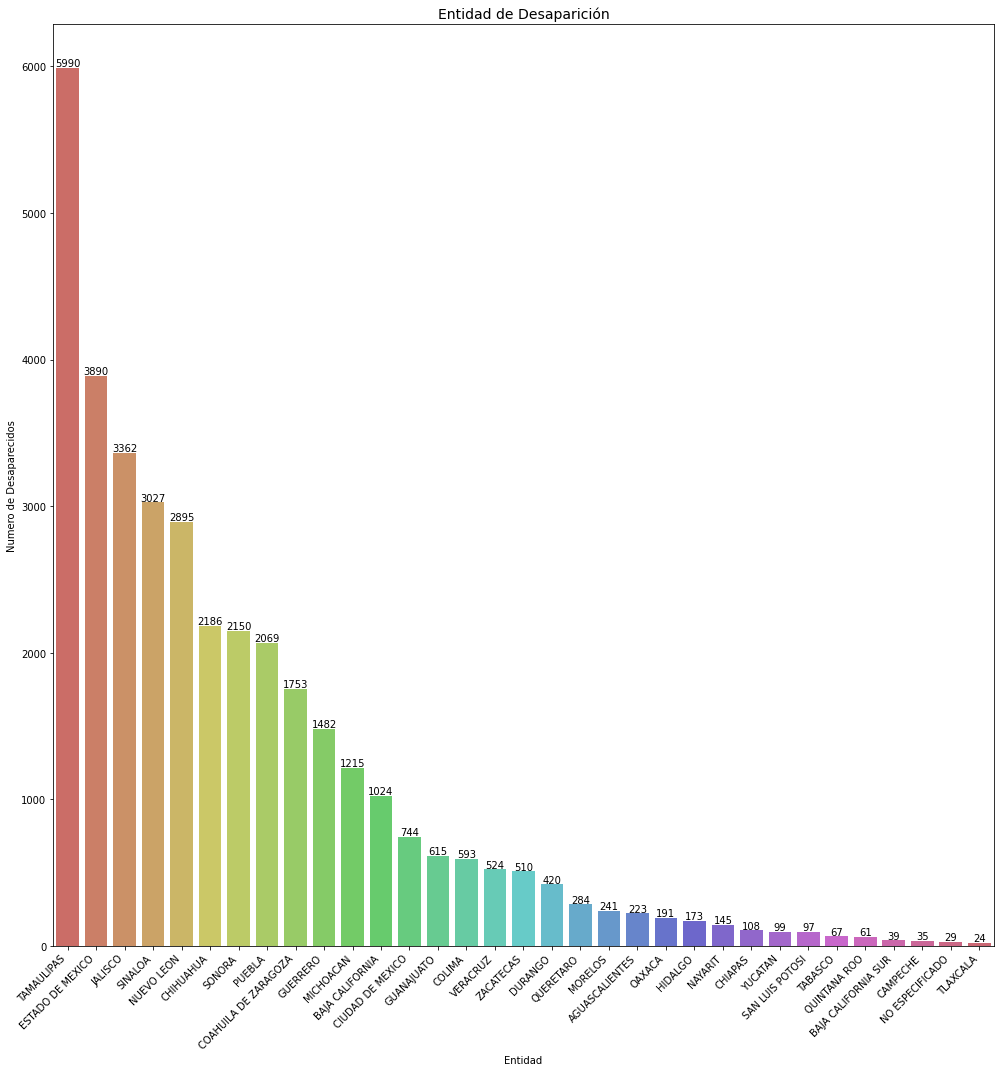

In [ ]:
#A continuación se realiza una gráfica para saber si, como dicen los datos de varias fuentes,
#Jalisco es el estado con más desaparecidos desde 1964
plt.figure(figsize=(14, 15))
ax = sns.countplot( x = 'Entidad', data = desapariciones_df, palette = "hls", order = desapariciones_df['Entidad'].value_counts().index)
_ = plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'  
)

plt.title('Entidad de Desaparición',fontsize= 14)
plt.ylabel('Numero de Desaparecidos')

# calculate passengers for each category
labels = (desapariciones_df['Entidad'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+10, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    

plt.tight_layout()
plt.show()

Como se vio con anterioridad, este dataset menciona que Jalisco no es el estado con mayores incidencias de desapariciones. Sin embargo, se puede asumir que esta diferencia se debe a la **cifra negra** del estado de Jalisco.
Primeramente, esta está compuesta por personas que no denuncian a sus desaparecidos por miedo o porque creen que estos decidieron irse. Pero también se puede decir que esta está conformada por los datos que el gobierno de Jalisco ha evitado introducir en sus reportes para que se pinte que en su gobierno las desapariciones "están disminuyendo".

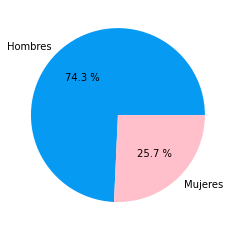

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

In [ ]:
#Se compara la cantidad de mujeres desaparecidas contra hombres
mylabels = ["Hombres", "Mujeres"]
colors = ['#069af3','#ffc0cb']
plt.pie(desapariciones_df["Sexo"].value_counts(), labels=mylabels ,colors=colors,autopct='%0.1f %%')
plt.show() 
plt.figure(figsize=(14,10))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


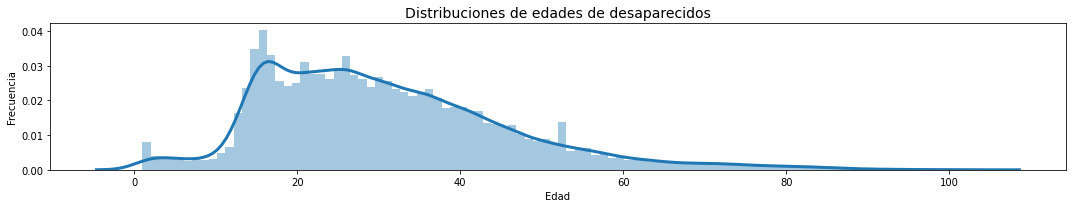

In [ ]:
#Se realiza una distribución para saber en qué edades hay más incidencia de desapariciones
desapariciones_df.loc[desapariciones_df["Edad"] == "NO ESPECIFICADO", "Edad"] = np.nan
desapariciones_df["Edad"] = desapariciones_df["Edad"].astype(float)
#Cuántos hay de cada edad a partir de los 0 años
# set plot size
plt.figure(figsize=(15, 3))

# plot a univariate distribution of Age observations 
sns.distplot(desapariciones_df[(desapariciones_df["Edad"] > 0)].Edad, kde_kws={"lw": 3}, bins = 100)

# set titles and labels
plt.title('Distribuciones de edades de desaparecidos',fontsize= 14)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
# clean layout
plt.tight_layout()

In [ ]:
#Se calculan los datos paramétricos para poder analizar el promedio de personas que desaparecen
age_distr=pd.DataFrame(desapariciones_df["Edad"].describe())
age_distr.transpose()

,count,mean,std,min,25%,50%,75%,max
Edad,33109.0,30.801655,15.025777,1.0,20.0,28.0,39.0,103.0


In [ ]:
#Debido a que el máximo pareciera ser un outlier, se checa que realmente exista
#esta información en el dataser
desapariciones_df[desapariciones_df["Edad"] >= 100]

,Fecha,Hora,Pais,Entidad,Municipio,Localidad,Nacionalidad,Estatura,Complexion,Sexo,Edad,Descripcion de senas particulares,Etnia,Discapacidad,Dependencia que envio la informacion
36167,12/12/1997,06:00:00,MEXICO,NUEVO LEON,MONTERREY,MONTERREY,MEXICANA,1.68,MEDIANA,HOMBRE,103.0,"USABA BIGOTE, SIN BARBA,OREJAS GRANDES LOBULO ...",NO ESPECIFICADO,NINGUNO,PGJ - NUEVO LEON


# Limpieza del conjunto de datos

## Se convierte el string "NO ESPECIFICADO" en valores nulos para poder mejorar el uso de la base de datos

In [ ]:
#Los datos se convierten en nulos para que la base de datos sea más fácil de manejar
desapariciones_df.loc[desapariciones_df["Etnia"] == "NO ESPECIFICADO", "Etnia"] = np.nan
desapariciones_df.loc[desapariciones_df["Edad"] == "NO ESPECIFICADO", "Edad"] = np.nan
desapariciones_df.loc[desapariciones_df["Fecha"] == "NO ESPECIFICADO", "Fecha"] = np.nan
desapariciones_df.loc[desapariciones_df["Hora"] == "NO ESPECIFICADO", "Hora"] = np.nan
desapariciones_df.loc[desapariciones_df["Entidad"] == "NO ESPECIFICADO", "Entidad"] = np.nan
desapariciones_df.loc[desapariciones_df["Municipio"] == "NO ESPECIFICADO", "Municipio"] = np.nan
desapariciones_df.loc[desapariciones_df["Localidad"] == "NO ESPECIFICADO", "Localidad"] = np.nan
desapariciones_df.loc[desapariciones_df["Nacionalidad"] == "NO ESPECIFICADO", "Nacionalidad"] = np.nan
desapariciones_df.loc[desapariciones_df["Estatura"] == "NO ESPECIFICADO", "Estatura"] = np.nan
desapariciones_df.loc[desapariciones_df["Estatura"] == "no ESPECIFICADO", "Estatura"] = np.nan
desapariciones_df.loc[desapariciones_df["Complexion"] == "NO ESPECIFICADO", "Complexion"] = np.nan
desapariciones_df.loc[desapariciones_df["Sexo"] == "NO ESPECIFICADO", "Sexo"] = np.nan
desapariciones_df.loc[desapariciones_df["Descripcion de senas particulares"] == "NO ESPECIFICADO", "Descripcion de senas particulares"] = np.nan
desapariciones_df.loc[desapariciones_df["Discapacidad"] == "NO ESPECIFICADO", "Discapacidad"] = np.nan
desapariciones_df.loc[desapariciones_df["Dependencia que envio la informacion"] == "NO ESPECIFICADO", "Dependencia que envio la informacion"] = np.nan

## Se realiza una columna de fecha y hora con el formato DateTime

In [ ]:
#Esta columna tipo datetime se realiza para analizar los meses y días con mayor incidencia
desapariciones_df["Fecha_hora"] = pd.to_datetime(desapariciones_df['Fecha']+" "+desapariciones_df['Hora'], infer_datetime_format=True)
desapariciones_df

,Fecha,Hora,Pais,Entidad,Municipio,Localidad,Nacionalidad,Estatura,Complexion,Sexo,Edad,Descripcion de senas particulares,Etnia,Discapacidad,Dependencia que envio la informacion,Fecha_hora
1,18/03/2012,05:00:00,MEXICO,SONORA,NAVOJOA,NAVOJOA,MEXICANA,1.1,DELGADA,MUJER,7.0,TIENE UNA CICATRIZ EN LA RODILLA IZQUIERDA POR...,NaN,NINGUNO,FGE - SONORA,2012-03-18 05:00:00
2,05/02/2007,02:00:26,MEXICO,ESTADO DE MEXICO,VALLE DE BRAVO,VALLE DE BRAVO,MEXICANA,1.1,DELGADA,MUJER,4.0,NaN,NaN,NINGUNO,FGJ - ESTADO DE MEXICO,2007-02-05 02:00:26
3,14/03/2009,08:30:54,MEXICO,ESTADO DE MEXICO,CHALCO,CHALCO,MEXICANA,1.1,DELGADA,HOMBRE,6.0,"MANCHAS, PARTE SUPERIOR DE PIERNA DERECHA, CIC...",NaN,NINGUNO,FGJ - ESTADO DE MEXICO,2009-03-14 08:30:54
4,23/12/2006,08:00:28,MEXICO,ESTADO DE MEXICO,TLALNEPANTLA DE BAZ,TLALNEPANTLA DE BAZ,MEXICANA,1.1,DELGADA,HOMBRE,10.0,"LUNARES, A LA ALTURA DE LA CINTURAFORMA DE MAN...",NaN,NINGUNO,FGJ - ESTADO DE MEXICO,2006-12-23 08:00:28
5,11/01/2008,12:00:17,MEXICO,ESTADO DE MEXICO,TOLUCA,TOLUCA,MEXICANA,1.1,DELGADA,HOMBRE,4.0,NaN,NaN,NINGUNO,FGJ - ESTADO DE MEXICO,2008-01-11 12:00:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36261,26/04/2018,08:00:00,MEXICO,PUEBLA,PUEBLA,PUEBLA,MEXICANA,1.6,DELGADA,HOMBRE,22.0,LUNAR EN LA MEJILLA Y TATUAJE EN EL CUELLO EN ...,NaN,NINGUNO,FGE - PUEBLA,2018-04-26 08:00:00
36262,08/01/2018,11:00:00,MEXICO,COLIMA,VILLA DE ALVAREZ,VILLA DE ALVAREZ,MEXICANA,1.7,ROBUSTA,MUJER,27.0,"EL OJO IZQUIERDO TIENE UN ENFERMEDAD COMO TIC,...",NaN,NINGUNO,PGJ - COLIMA,2018-01-08 11:00:00
36263,02/02/2015,07:00:00,MEXICO,PUEBLA,CHILA,CHILAS DE LAS FLORES,MEXICANA,1.77,MEDIANA,MUJER,86.0,NaN,NaN,NINGUNO,FGE - PUEBLA,2015-02-02 07:00:00
36264,22/08/2017,04:00:00,MEXICO,COLIMA,VILLA DE ALVAREZ,VILLA DE ALVAREZ,MEXICANA,1.76,ROBUSTA,HOMBRE,41.0,TATUAJE EN EL BRAZO IZQUIERDO CON LA IMAGEN DE...,NaN,NINGUNO,PGJ - COLIMA,2017-08-22 04:00:00


In [ ]:
desapariciones_df.info() #Se analiza cuántos valores faltantes hay en cada columna

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36265 entries, 1 to 36265
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Fecha                                 35927 non-null  object        
 1   Hora                                  36249 non-null  object        
 2   Pais                                  36265 non-null  object        
 3   Entidad                               36236 non-null  object        
 4   Municipio                             35597 non-null  object        
 5   Localidad                             32852 non-null  object        
 6   Nacionalidad                          34225 non-null  object        
 7   Estatura                              25257 non-null  object        
 8   Complexion                            25696 non-null  object        
 9   Sexo                                  36265 non-null  object        
 10

## Borramos los datos de cualquier entidad distinta de Jalisco


In [ ]:
#Como trabajaremos con la entidad de Jalisco, es más conveniente para la eficiencia del manejo de datos 
#solo quedarnos con los datos que necesitaremos
jalisco_df=desapariciones_df[desapariciones_df["Entidad"]=="JALISCO"] #Se realiza el data frame solamente de Jalisco
jalisco_df

,Fecha,Hora,Pais,Entidad,Municipio,Localidad,Nacionalidad,Estatura,Complexion,Sexo,Edad,Descripcion de senas particulares,Etnia,Discapacidad,Dependencia que envio la informacion,Fecha_hora
523,01/01/2006,12:00:00,MEXICO,JALISCO,ZAPOPAN,DURANGO,MEXICANA,1.65,DELGADA,HOMBRE,21.0,CICATRIZ EN LA FRENTE Y LE FALTA UN DIENTE,NaN,NINGUNO,FGE - DURANGO,2006-01-01 12:00:00
1416,28/07/2011,03:00:00,MEXICO,JALISCO,GUADALAJARA,GUADALAJARA,MEXICANA,1.7,ROBUSTA,HOMBRE,23.0,NaN,NaN,NINGUNO,FGE - PUEBLA,2011-07-28 03:00:00
4276,08/08/2012,08:00:00,MEXICO,JALISCO,VALLE DE JUAREZ,VALLE DE JUAREZ,MEXICANA,1.8,ROBUSTA,HOMBRE,25.0,TATUAJES EN UN BRAZO DICE OROZCO Y EL OTRO VEG...,NaN,NINGUNO,FGE - JALISCO,2012-08-08 08:00:00
4277,07/08/2012,10:30:00,MEXICO,JALISCO,MAZAMITLA,MAZAMITLA,MEXICANA,1.71,DELGADA,HOMBRE,27.0,LABIO LEPORINO SUPERIOR.,NaN,NINGUNO,FGE - JALISCO,2012-08-07 10:30:00
4278,07/08/2012,09:00:00,MEXICO,JALISCO,MAZAMITLA,MAZAMITLA,MEXICANA,1.75,DELGADA,HOMBRE,28.0,CICATRIZ EN FORMA DE ALACRAN EN BRAZO IZQUIERDO.,NaN,NINGUNO,FGE - JALISCO,2012-08-07 09:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36187,10/08/2017,09:00:00,MEXICO,JALISCO,TONALA,TONALA,MEXICANA,1.75,MEDIANA,HOMBRE,39.0,TIENE UN LUNAR ABULTADO EN LA ESPALDA Y UNO EN...,NaN,NINGUNO,FGE - JALISCO,2017-08-10 09:00:00
36192,25/09/2017,09:30:00,MEXICO,JALISCO,ZAPOPAN,ZAPOPAN,MEXICANA,1.65,ROBUSTA,HOMBRE,24.0,"TIENE UNA CICATRIZ EN LA PANTORRILLA DERECHA, ...",NaN,NINGUNO,FGE - JALISCO,2017-09-25 09:30:00
36239,17/11/2017,11:00:00,MEXICO,JALISCO,ARANDAS,ARANDAS,MEXICANA,1.65,DELGADA,HOMBRE,32.0,TIENE UN MECHON DE CANAS EN LA PARTE FRONTAL D...,NaN,NINGUNO,FGE - JALISCO,2017-11-17 11:00:00
36240,23/09/2017,05:00:00,MEXICO,JALISCO,TEPATITLAN DE MORELOS,TEPATITLAN DE MORELOS,MEXICANA,1.75,MEDIANA,HOMBRE,48.0,NaN,NaN,NINGUNO,FGE - JALISCO,2017-09-23 05:00:00


## Se rellenan los valores faltantes

In [ ]:
# Se determinan los valores faltantes para analizar cómo se van a tratar
jalisco_df.isna().sum()

Fecha                                      1
Hora                                       0
Pais                                       0
Entidad                                    0
Municipio                                 48
Localidad                                118
Nacionalidad                               3
Estatura                                 208
Complexion                               142
Sexo                                       0
Edad                                      34
Descripcion de senas particulares        850
Etnia                                   3347
Discapacidad                              82
Dependencia que envio la informacion       0
Fecha_hora                                 1
dtype: int64

In [ ]:
#Se cambian los valores faltantes de estas variables con su valor promedio
#para que no afecten el análisis de datos.
#Esto debido a que no se quieren eliminar filas que tienen información importante 
#en sus otras columnas y la moda podría hacer que un número tenga mayor peso del que
#debería tener.

#Se cambian los valores de los datos de estatura por su promedio.
jalisco_df["Estatura"] = jalisco_df["Estatura"].astype(float)
jalisco_df["Estatura"] = jalisco_df["Estatura"].fillna(jalisco_df["Estatura"].mean())

#Se cambia los valores de los datos de edades
jalisco_df["Edad"] = jalisco_df["Edad"].astype(float)
jalisco_df["Edad"] = jalisco_df["Edad"].fillna(jalisco_df["Edad"].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [ ]:
#Se saca la moda de los municipios para el cambio de variables
jalisco_df['Municipio'].mode()

0    GUADALAJARA
dtype: object

In [ ]:
#Debido a que no se puede sacar el promedio de la columna, se utiliza la moda 
#de la columna 'Municipio' debido a que, como la mayoría de las
#personas desaparecen en dicho lugar, lo más probable es que los NO ESPECIFICADOS
#hayan desaparecido en este.
jalisco_df["Municipio"] = jalisco_df["Municipio"].fillna("GUADALAJARA")
jalisco_df.isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Fecha                                      1
Hora                                       0
Pais                                       0
Entidad                                    0
Municipio                                  0
Localidad                                118
Nacionalidad                               3
Estatura                                   0
Complexion                               142
Sexo                                       0
Edad                                       0
Descripcion de senas particulares        850
Etnia                                   3347
Discapacidad                              82
Dependencia que envio la informacion       0
Fecha_hora                                 1
dtype: int64

## Se realiza una columna nueva que diga el rango de edad al que pertenece la persona que desapareció

In [ ]:
#Se realiza una columna de rango de edad para que, en lugar de considerar edades
#desde 0-103, se puedan reducir los grupos a 15 grupos.
#Se hacen en intervalos de 5 años debido a que así se realizan los gráficos 
#del gobierno mexicano.

jalisco_df["Rango de Edad"]=""
jalisco_df.loc[(jalisco_df["Edad"]>=0) &
                (jalisco_df["Edad"]<=4),"Rango de Edad"]="0-4"
jalisco_df.loc[(pd.to_numeric(jalisco_df["Edad"])>=5) &
                (pd.to_numeric(jalisco_df["Edad"])<=9),"Rango de Edad"]="5-9"  
jalisco_df.loc[(pd.to_numeric(jalisco_df["Edad"])>=10) &
                (pd.to_numeric(jalisco_df["Edad"])<=14),"Rango de Edad"]="10-14"
jalisco_df.loc[(pd.to_numeric(jalisco_df["Edad"])>=15) &
                (pd.to_numeric(jalisco_df["Edad"])<=19),"Rango de Edad"]="15-19"
jalisco_df.loc[(pd.to_numeric(jalisco_df["Edad"])>=20) &
                (pd.to_numeric(jalisco_df["Edad"])<=24),"Rango de Edad"]="20-24"  
jalisco_df.loc[(pd.to_numeric(jalisco_df["Edad"])>=25) &
                (pd.to_numeric(jalisco_df["Edad"])<=29),"Rango de Edad"]="25-29"
jalisco_df.loc[(pd.to_numeric(jalisco_df["Edad"])>=30) &
                (pd.to_numeric(jalisco_df["Edad"])<=34),"Rango de Edad"]="30-34"
jalisco_df.loc[(pd.to_numeric(jalisco_df["Edad"])>=35) &
                (pd.to_numeric(jalisco_df["Edad"])<=39),"Rango de Edad"]="35-39"  
jalisco_df.loc[(pd.to_numeric(jalisco_df["Edad"])>=40) &
                (pd.to_numeric(jalisco_df["Edad"])<=54),"Rango de Edad"]="40-54"
jalisco_df.loc[(pd.to_numeric(jalisco_df["Edad"])>=55) &
                (pd.to_numeric(jalisco_df["Edad"])<=59),"Rango de Edad"]="55-59"
jalisco_df.loc[(pd.to_numeric(jalisco_df["Edad"])>=60) &
                (pd.to_numeric(jalisco_df["Edad"])<=64),"Rango de Edad"]="60-64"  
jalisco_df.loc[(pd.to_numeric(jalisco_df["Edad"])>=65) &
                (pd.to_numeric(jalisco_df["Edad"])<=69),"Rango de Edad"]="65-69"
jalisco_df.loc[(pd.to_numeric(jalisco_df["Edad"])>=70) &
                (pd.to_numeric(jalisco_df["Edad"])<=74),"Rango de Edad"]="70-74"
jalisco_df.loc[(pd.to_numeric(jalisco_df["Edad"])>=75) &
                (pd.to_numeric(jalisco_df["Edad"])<=79),"Rango de Edad"]="75-79"  
jalisco_df.loc[(pd.to_numeric(jalisco_df["Edad"])>=80),"Rango de Edad"]=">80"
jalisco_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Fecha,Hora,Pais,Entidad,Municipio,Localidad,Nacionalidad,Estatura,Complexion,Sexo,Edad,Descripcion de senas particulares,Etnia,Discapacidad,Dependencia que envio la informacion,Fecha_hora,Rango de Edad
523,01/01/2006,12:00:00,MEXICO,JALISCO,ZAPOPAN,DURANGO,MEXICANA,1.65,DELGADA,HOMBRE,21.0,CICATRIZ EN LA FRENTE Y LE FALTA UN DIENTE,NaN,NINGUNO,FGE - DURANGO,2006-01-01 12:00:00,20-24
1416,28/07/2011,03:00:00,MEXICO,JALISCO,GUADALAJARA,GUADALAJARA,MEXICANA,1.70,ROBUSTA,HOMBRE,23.0,NaN,NaN,NINGUNO,FGE - PUEBLA,2011-07-28 03:00:00,20-24
4276,08/08/2012,08:00:00,MEXICO,JALISCO,VALLE DE JUAREZ,VALLE DE JUAREZ,MEXICANA,1.80,ROBUSTA,HOMBRE,25.0,TATUAJES EN UN BRAZO DICE OROZCO Y EL OTRO VEG...,NaN,NINGUNO,FGE - JALISCO,2012-08-08 08:00:00,25-29
4277,07/08/2012,10:30:00,MEXICO,JALISCO,MAZAMITLA,MAZAMITLA,MEXICANA,1.71,DELGADA,HOMBRE,27.0,LABIO LEPORINO SUPERIOR.,NaN,NINGUNO,FGE - JALISCO,2012-08-07 10:30:00,25-29
4278,07/08/2012,09:00:00,MEXICO,JALISCO,MAZAMITLA,MAZAMITLA,MEXICANA,1.75,DELGADA,HOMBRE,28.0,CICATRIZ EN FORMA DE ALACRAN EN BRAZO IZQUIERDO.,NaN,NINGUNO,FGE - JALISCO,2012-08-07 09:00:00,25-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36187,10/08/2017,09:00:00,MEXICO,JALISCO,TONALA,TONALA,MEXICANA,1.75,MEDIANA,HOMBRE,39.0,TIENE UN LUNAR ABULTADO EN LA ESPALDA Y UNO EN...,NaN,NINGUNO,FGE - JALISCO,2017-08-10 09:00:00,35-39
36192,25/09/2017,09:30:00,MEXICO,JALISCO,ZAPOPAN,ZAPOPAN,MEXICANA,1.65,ROBUSTA,HOMBRE,24.0,"TIENE UNA CICATRIZ EN LA PANTORRILLA DERECHA, ...",NaN,NINGUNO,FGE - JALISCO,2017-09-25 09:30:00,20-24
36239,17/11/2017,11:00:00,MEXICO,JALISCO,ARANDAS,ARANDAS,MEXICANA,1.65,DELGADA,HOMBRE,32.0,TIENE UN MECHON DE CANAS EN LA PARTE FRONTAL D...,NaN,NINGUNO,FGE - JALISCO,2017-11-17 11:00:00,30-34
36240,23/09/2017,05:00:00,MEXICO,JALISCO,TEPATITLAN DE MORELOS,TEPATITLAN DE MORELOS,MEXICANA,1.75,MEDIANA,HOMBRE,48.0,NaN,NaN,NINGUNO,FGE - JALISCO,2017-09-23 05:00:00,40-54


## Se elimina las columnas que no serán necesarias para el proyecto

In [ ]:
jalisco_df=jalisco_df.drop(['Etnia'], axis=1) #Se elimina porque hay muchos datos faltantes y por lo tanto no sirve tanto la información de esta columna.
jalisco_df=jalisco_df.drop(['Localidad'], axis=1) #La mayoría de las localidades son iguales al municipio, por lo tanto se decide borrar esta columna.
jalisco_df=jalisco_df.drop(['Entidad'], axis=1) #Ya que sabemos que todos los desaparecidos son de jalisco, no es necesario tener en la columna de qué estado es la persona
jalisco_df=jalisco_df.drop(['Discapacidad'], axis=1) #Debido a que son pocas las personas con discapacidad, podemos asumir que no es un factor que afecta a las desapariciones.
jalisco_df=jalisco_df.drop(['Pais'], axis=1) #Debido a que la base de datos es de México, nunca cambiará el valor
jalisco_df=jalisco_df.drop(['Fecha'], axis=1) #Debido a que ya se tiene una columna tipo datetime con esta información
jalisco_df=jalisco_df.drop(['Hora'], axis=1) #Debido a que ya se tiene una columna tipo datetime con esta información
jalisco_df

,Municipio,Nacionalidad,Estatura,Complexion,Sexo,Edad,Descripcion de senas particulares,Dependencia que envio la informacion,Fecha_hora,Rango de Edad
523,ZAPOPAN,MEXICANA,1.65,DELGADA,HOMBRE,21.0,CICATRIZ EN LA FRENTE Y LE FALTA UN DIENTE,FGE - DURANGO,2006-01-01 12:00:00,20-24
1416,GUADALAJARA,MEXICANA,1.70,ROBUSTA,HOMBRE,23.0,NaN,FGE - PUEBLA,2011-07-28 03:00:00,20-24
4276,VALLE DE JUAREZ,MEXICANA,1.80,ROBUSTA,HOMBRE,25.0,TATUAJES EN UN BRAZO DICE OROZCO Y EL OTRO VEG...,FGE - JALISCO,2012-08-08 08:00:00,25-29
4277,MAZAMITLA,MEXICANA,1.71,DELGADA,HOMBRE,27.0,LABIO LEPORINO SUPERIOR.,FGE - JALISCO,2012-08-07 10:30:00,25-29
4278,MAZAMITLA,MEXICANA,1.75,DELGADA,HOMBRE,28.0,CICATRIZ EN FORMA DE ALACRAN EN BRAZO IZQUIERDO.,FGE - JALISCO,2012-08-07 09:00:00,25-29
...,...,...,...,...,...,...,...,...,...,...
36187,TONALA,MEXICANA,1.75,MEDIANA,HOMBRE,39.0,TIENE UN LUNAR ABULTADO EN LA ESPALDA Y UNO EN...,FGE - JALISCO,2017-08-10 09:00:00,35-39
36192,ZAPOPAN,MEXICANA,1.65,ROBUSTA,HOMBRE,24.0,"TIENE UNA CICATRIZ EN LA PANTORRILLA DERECHA, ...",FGE - JALISCO,2017-09-25 09:30:00,20-24
36239,ARANDAS,MEXICANA,1.65,DELGADA,HOMBRE,32.0,TIENE UN MECHON DE CANAS EN LA PARTE FRONTAL D...,FGE - JALISCO,2017-11-17 11:00:00,30-34
36240,TEPATITLAN DE MORELOS,MEXICANA,1.75,MEDIANA,HOMBRE,48.0,NaN,FGE - JALISCO,2017-09-23 05:00:00,40-54


In [ ]:
#Se separan el día, mes y año de la columna tipo datetime en distintas columnas para analizar
#qué días y meses hay mayores incidencias de desapariciones. El año será meramente para ver
#los cambios de desapariciones en Jalisco a lo largo de los años.
jalisco_df['Dia']=pd.DatetimeIndex(jalisco_df['Fecha_hora']).day
jalisco_df['Mes']=pd.DatetimeIndex(jalisco_df['Fecha_hora']).month
jalisco_df['Año']=pd.DatetimeIndex(jalisco_df['Fecha_hora']).year
jalisco_df

,Municipio,Nacionalidad,Estatura,Complexion,Sexo,Edad,Descripcion de senas particulares,Dependencia que envio la informacion,Fecha_hora,Rango de Edad,Dia,Mes,Año
523,ZAPOPAN,MEXICANA,1.65,DELGADA,HOMBRE,21.0,CICATRIZ EN LA FRENTE Y LE FALTA UN DIENTE,FGE - DURANGO,2006-01-01 12:00:00,20-24,1.0,1.0,2006.0
1416,GUADALAJARA,MEXICANA,1.70,ROBUSTA,HOMBRE,23.0,NaN,FGE - PUEBLA,2011-07-28 03:00:00,20-24,28.0,7.0,2011.0
4276,VALLE DE JUAREZ,MEXICANA,1.80,ROBUSTA,HOMBRE,25.0,TATUAJES EN UN BRAZO DICE OROZCO Y EL OTRO VEG...,FGE - JALISCO,2012-08-08 08:00:00,25-29,8.0,8.0,2012.0
4277,MAZAMITLA,MEXICANA,1.71,DELGADA,HOMBRE,27.0,LABIO LEPORINO SUPERIOR.,FGE - JALISCO,2012-08-07 10:30:00,25-29,7.0,8.0,2012.0
4278,MAZAMITLA,MEXICANA,1.75,DELGADA,HOMBRE,28.0,CICATRIZ EN FORMA DE ALACRAN EN BRAZO IZQUIERDO.,FGE - JALISCO,2012-08-07 09:00:00,25-29,7.0,8.0,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36187,TONALA,MEXICANA,1.75,MEDIANA,HOMBRE,39.0,TIENE UN LUNAR ABULTADO EN LA ESPALDA Y UNO EN...,FGE - JALISCO,2017-08-10 09:00:00,35-39,10.0,8.0,2017.0
36192,ZAPOPAN,MEXICANA,1.65,ROBUSTA,HOMBRE,24.0,"TIENE UNA CICATRIZ EN LA PANTORRILLA DERECHA, ...",FGE - JALISCO,2017-09-25 09:30:00,20-24,25.0,9.0,2017.0
36239,ARANDAS,MEXICANA,1.65,DELGADA,HOMBRE,32.0,TIENE UN MECHON DE CANAS EN LA PARTE FRONTAL D...,FGE - JALISCO,2017-11-17 11:00:00,30-34,17.0,11.0,2017.0
36240,TEPATITLAN DE MORELOS,MEXICANA,1.75,MEDIANA,HOMBRE,48.0,NaN,FGE - JALISCO,2017-09-23 05:00:00,40-54,23.0,9.0,2017.0


In [ ]:
#Se multiplica la estatura por 100 ya que se quiere trabajar con  un data frame que sea solamente de números enteros
jalisco_df['Estatura'] = jalisco_df['Estatura'].apply(lambda x: x*100)
jalisco_df

,Municipio,Nacionalidad,Estatura,Complexion,Sexo,Edad,Descripcion de senas particulares,Dependencia que envio la informacion,Fecha_hora,Rango de Edad,Dia,Mes,Año
523,ZAPOPAN,MEXICANA,165.0,DELGADA,HOMBRE,21.0,CICATRIZ EN LA FRENTE Y LE FALTA UN DIENTE,FGE - DURANGO,2006-01-01 12:00:00,20-24,1.0,1.0,2006.0
1416,GUADALAJARA,MEXICANA,170.0,ROBUSTA,HOMBRE,23.0,NaN,FGE - PUEBLA,2011-07-28 03:00:00,20-24,28.0,7.0,2011.0
4276,VALLE DE JUAREZ,MEXICANA,180.0,ROBUSTA,HOMBRE,25.0,TATUAJES EN UN BRAZO DICE OROZCO Y EL OTRO VEG...,FGE - JALISCO,2012-08-08 08:00:00,25-29,8.0,8.0,2012.0
4277,MAZAMITLA,MEXICANA,171.0,DELGADA,HOMBRE,27.0,LABIO LEPORINO SUPERIOR.,FGE - JALISCO,2012-08-07 10:30:00,25-29,7.0,8.0,2012.0
4278,MAZAMITLA,MEXICANA,175.0,DELGADA,HOMBRE,28.0,CICATRIZ EN FORMA DE ALACRAN EN BRAZO IZQUIERDO.,FGE - JALISCO,2012-08-07 09:00:00,25-29,7.0,8.0,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36187,TONALA,MEXICANA,175.0,MEDIANA,HOMBRE,39.0,TIENE UN LUNAR ABULTADO EN LA ESPALDA Y UNO EN...,FGE - JALISCO,2017-08-10 09:00:00,35-39,10.0,8.0,2017.0
36192,ZAPOPAN,MEXICANA,165.0,ROBUSTA,HOMBRE,24.0,"TIENE UNA CICATRIZ EN LA PANTORRILLA DERECHA, ...",FGE - JALISCO,2017-09-25 09:30:00,20-24,25.0,9.0,2017.0
36239,ARANDAS,MEXICANA,165.0,DELGADA,HOMBRE,32.0,TIENE UN MECHON DE CANAS EN LA PARTE FRONTAL D...,FGE - JALISCO,2017-11-17 11:00:00,30-34,17.0,11.0,2017.0
36240,TEPATITLAN DE MORELOS,MEXICANA,175.0,MEDIANA,HOMBRE,48.0,NaN,FGE - JALISCO,2017-09-23 05:00:00,40-54,23.0,9.0,2017.0


# Análisis del conjunto de datos

## Se analiza en qué municipios hay más desapariciones

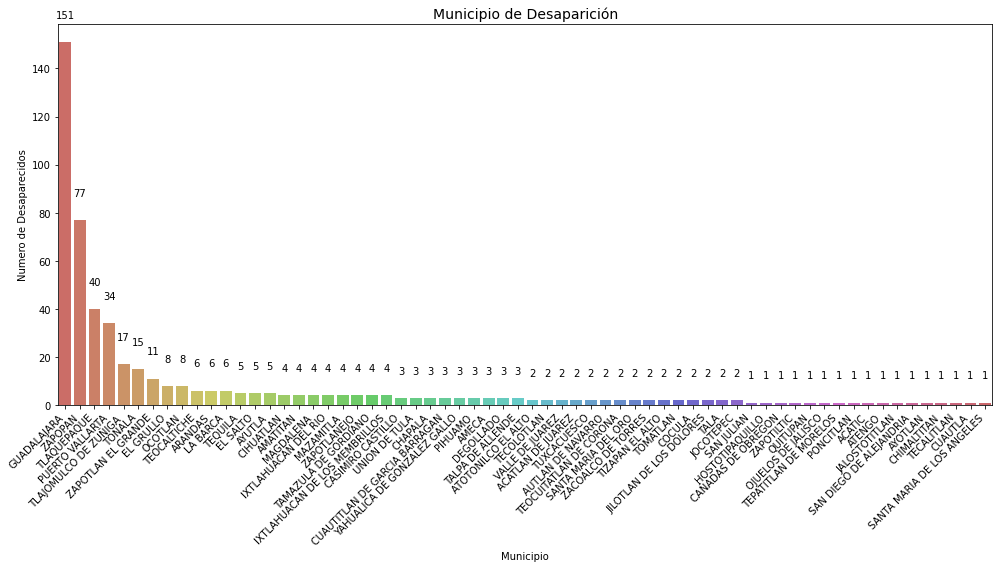

In [ ]:
grafica_df=jalisco_df.head(500)

plt.figure(figsize=(14, 8))
ax = sns.countplot( x = 'Municipio', data = grafica_df, palette = "hls", order = grafica_df['Municipio'].value_counts().index)
_ = plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'  
)

plt.title('Municipio de Desaparición',fontsize= 14)
plt.ylabel('Numero de Desaparecidos')

# calculate passengers for each category
labels = (grafica_df['Municipio'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+10, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    

plt.tight_layout()
plt.show()

## Se analiza el género de los desaparecidos en Jalisco

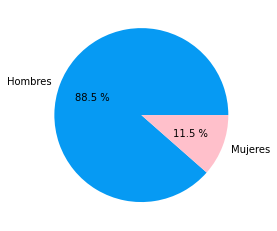

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

In [ ]:
mylabels = ["Hombres", "Mujeres"]
colors = ['#069af3','#ffc0cb']
plt.pie(jalisco_df["Sexo"].value_counts(), labels=mylabels ,colors=colors,autopct='%0.1f %%')
plt.show() 
plt.figure(figsize=(14,10))

## Se analizan las edades de los desaparecidos en Jalisco

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


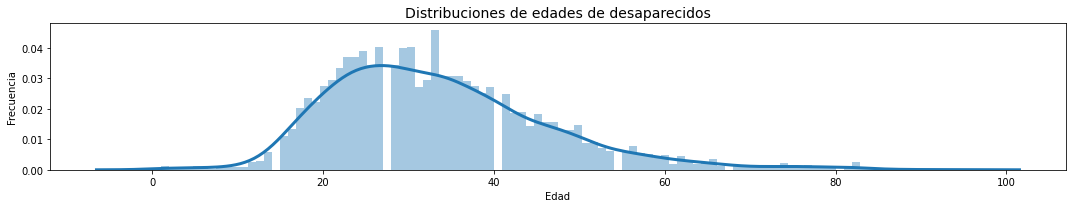

In [ ]:
#Cuántos hay de cada edad a partir de los 0 años
# set plot size
plt.figure(figsize=(15, 3))

# plot a univariate distribution of Age observations 
sns.distplot(jalisco_df[(jalisco_df["Edad"] > 0)].Edad, kde_kws={"lw": 3}, bins = 100)

# set titles and labels
plt.title('Distribuciones de edades de desaparecidos',fontsize= 14)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
# clean layout
plt.tight_layout()

In [ ]:
age_distr=pd.DataFrame(jalisco_df["Edad"].describe())
age_distr.transpose()

,count,mean,std,min,25%,50%,75%,max
Edad,3362.0,33.528846,12.726487,1.0,24.0,32.0,40.0,94.0


## Se analizan las alturas

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


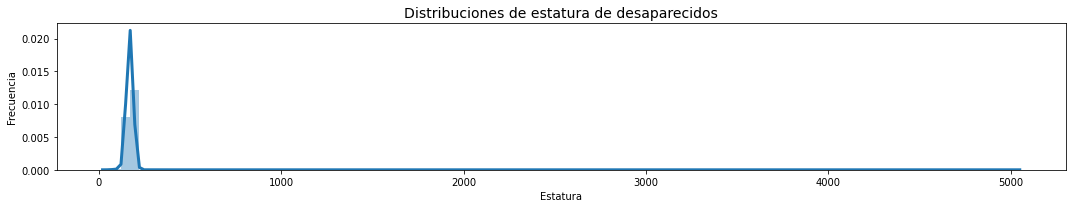

In [ ]:
# set plot size
plt.figure(figsize=(15, 3))

# plot a univariate distribution of Age observations 
sns.distplot(jalisco_df[(jalisco_df["Estatura"] > 0)].Estatura, kde_kws={"lw": 3}, bins = 100)

# set titles and labels
plt.title('Distribuciones de estatura de desaparecidos',fontsize= 14)
plt.xlabel('Estatura')
plt.ylabel('Frecuencia')
# clean layout
plt.tight_layout()

Se nota que hay un error en los datos por lo que analizamos ya que aparece que hay personas de 50 mts

In [ ]:
height_distr=pd.DataFrame(jalisco_df["Estatura"].describe())
height_distr.transpose()

,count,mean,std,min,25%,50%,75%,max
Estatura,3362.0,170.508244,83.899779,70.0,165.0,170.0,175.0,5000.0


In [ ]:
jalisco_df[(jalisco_df['Estatura']<100) | (jalisco_df['Estatura']>220)]

,Municipio,Nacionalidad,Estatura,Complexion,Sexo,Edad,Descripcion de senas particulares,Dependencia que envio la informacion,Fecha_hora,Rango de Edad,Dia,Mes,Año
12258,TONALA,MEXICANA,80.0,MEDIANA,HOMBRE,5.0,LUNAR NEGRO EN CADA PIERNA DE APROXIMADAMENTE ...,FGE - JALISCO,2013-07-29 03:45:00,5-9,29.0,7.0,2013.0
12537,ZAPOPAN,MEXICANA,70.0,ROBUSTA,HOMBRE,10.0,LUNAR EN PIE IZQUIERDO COLOR CAFE CLARO,FGE - JALISCO,2013-08-27 08:00:00,10-14,27.0,8.0,2013.0
13508,TLAJOMULCO DE ZUÑIGA,MEXICANA,95.0,ROBUSTA,HOMBRE,2.0,NaN,FGE - JALISCO,2013-10-20 10:00:00,0-4,20.0,10.0,2013.0
13539,EL SALTO,MEXICANA,70.0,DELGADA,MUJER,6.0,NaN,FGE - JALISCO,2013-10-06 03:00:00,5-9,6.0,10.0,2013.0
35062,LAGOS DE MORENO,MEXICANA,5000.0,DELGADA,HOMBRE,1.0,"LUNAR REDONDO EN GLUTEO EN COLOR CAFE, CICATRI...",FGE - JALISCO,2017-11-05 12:00:00,0-4,5.0,11.0,2017.0


Se confirma que el dataframe contiene un dato que dice que hay una persona de 50 mts pero también se descubre que hay dos personas de 70 cm. Asimismo, podemos encontrar a personas de 80 y 95 cm.  

In [ ]:
jalisco_df.loc[jalisco_df["Estatura"]==70,'Estatura']=170 #Se asume que solamente se pusieron los centímetros de la persona y no el metro, por lo que se cambia a 170 cm
jalisco_df.loc[jalisco_df["Estatura"]==80,'Estatura']=180 #Se asume que solamente se pusieron los centímetros de la persona y no el metro, por lo que se cambia a 180 cm
jalisco_df.loc[jalisco_df["Estatura"]==95,'Estatura']=195 #Se asume que solamente se pusieron los centímetros de la persona y no el metro, por lo que se cambia a 195 cm
jalisco_df.loc[jalisco_df["Estatura"]==5000,'Estatura']=jalisco_df["Estatura"].mean() #Debido a que es más difícil asumir por qué se escribió que la persona medía 50 mts, se cambia el valor por el promedio de estaturas

In [ ]:
#Se checa si se realizaron los cambios correctamente
height_distr=pd.DataFrame(jalisco_df["Estatura"].describe())
height_distr.transpose()

,count,mean,std,min,25%,50%,75%,max
Estatura,3362.0,169.190762,9.37543,100.0,165.0,170.0,175.0,200.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


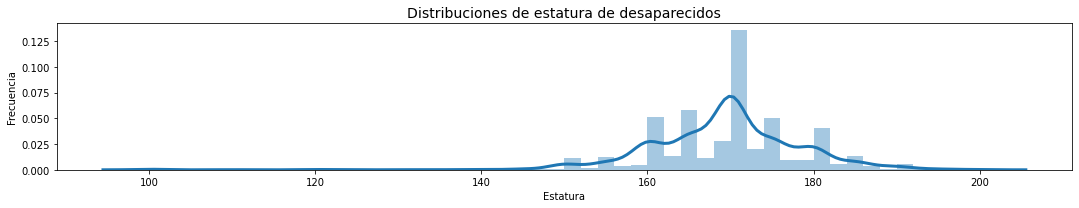

In [ ]:
#Se vuelve a graficar la distribución de estaturas con los datos cambiados
# set plot size
plt.figure(figsize=(15, 3))

# plot a univariate distribution of Age observations 
sns.distplot(jalisco_df[(jalisco_df["Estatura"] > 0)].Estatura, kde_kws={"lw": 3}, bins = 50)

# set titles and labels
plt.title('Distribuciones de estatura de desaparecidos',fontsize= 14)
plt.xlabel('Estatura')
plt.ylabel('Frecuencia')
# clean layout
plt.tight_layout()

## Se analizan las nacionalidades

In [ ]:
#Se observan qué nacionalidades hay en Jalisco
jalisco_df['Nacionalidad'].value_counts()

MEXICANA          3337
ESTADOUNIDENSE       8
COLOMBIANA           3
ITALIANA             3
CANADIENSE           2
CUBANA               1
ESPAÑOLA             1
GUATEMALTECO         1
HONDUREÑA            1
VENEZOLANA           1
SALVADOREÑA          1
Name: Nacionalidad, dtype: int64

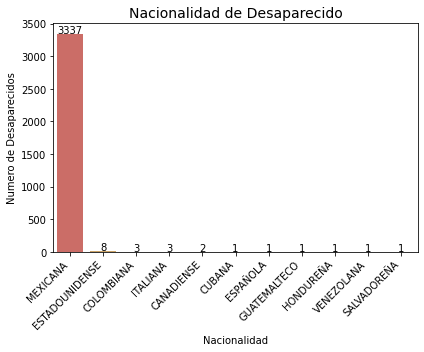

In [ ]:
#Se grafican las nacionalidades para ver gráficamente lo anterior

plt.figure(figsize=(6, 5))
ax = sns.countplot( x = 'Nacionalidad', data = jalisco_df, palette = "hls", order = jalisco_df['Nacionalidad'].value_counts().index)
_ = plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'  
)

plt.title('Nacionalidad de Desaparecido',fontsize= 14)
plt.ylabel('Numero de Desaparecidos')

# calculate passengers for each category
labels = (jalisco_df['Nacionalidad'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+10, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    

plt.tight_layout()
plt.show()

In [ ]:
#¿Los extranjeros solamente desaparecen en los cinco principales destinos 
#turísticos de Jalisco (Chapala, Cihuatlán,Guadalajara,Puerto Vallarta y San Juan de los Lagos)?
extranjeros = jalisco_df[(jalisco_df['Nacionalidad'] != 'MEXICANA') & 
                               ((jalisco_df['Municipio'] == 'PUERTO VALLARTA') | 
                               (jalisco_df['Municipio'] == 'GUADALAJARA') | 
                               (jalisco_df['Municipio'] == 'CHAPALA') |
                               (jalisco_df['Municipio'] == 'SAN JUAN DE LOS LAGOS')|
                               (jalisco_df['Municipio'] == 'CIHUATLAN'))]
extranjeros

,Municipio,Nacionalidad,Estatura,Complexion,Sexo,Edad,Descripcion de senas particulares,Dependencia que envio la informacion,Fecha_hora,Rango de Edad,Dia,Mes,Año
4724,GUADALAJARA,NaN,185.000000,DELGADA,HOMBRE,79.000000,NaN,FGE - JALISCO,2011-09-01 12:00:00,75-79,1.0,9.0,2011.0
4735,GUADALAJARA,CUBANA,162.000000,DELGADA,MUJER,22.000000,NaN,FGE - JALISCO,2010-11-29 12:00:00,20-24,29.0,11.0,2010.0
4826,CHAPALA,ESTADOUNIDENSE,175.000000,ROBUSTA,HOMBRE,68.000000,NaN,FGE - JALISCO,2011-09-09 07:00:00,65-69,9.0,9.0,2011.0
6919,PUERTO VALLARTA,NaN,170.508244,NaN,MUJER,33.528846,NaN,FGE - JALISCO,2011-03-23 07:30:00,30-34,23.0,3.0,2011.0
12035,PUERTO VALLARTA,ESTADOUNIDENSE,170.000000,DELGADA,HOMBRE,33.000000,NaN,FGE - JALISCO,2013-05-08 05:00:00,30-34,8.0,5.0,2013.0
12036,PUERTO VALLARTA,CANADIENSE,175.000000,DELGADA,HOMBRE,22.000000,TATUAJES EN AMBAS MANOS Y CUELLOS.,FGE - JALISCO,2013-05-08 05:00:00,20-24,8.0,5.0,2013.0
23725,GUADALAJARA,NaN,170.508244,NaN,MUJER,27.000000,NaN,PGJ - GUANAJUATO,2013-02-06 07:00:00,25-29,6.0,2.0,2013.0
24219,PUERTO VALLARTA,CANADIENSE,170.508244,DELGADA,HOMBRE,34.000000,NaN,FGE - JALISCO,2016-03-16 04:00:00,30-34,16.0,3.0,2016.0
24258,GUADALAJARA,ESTADOUNIDENSE,158.000000,DELGADA,HOMBRE,31.000000,CICATRIZ EN EL CUELLO HORIZONTAL DEL LADO IZQU...,FGE - JALISCO,2016-03-21 12:00:00,30-34,21.0,3.0,2016.0
29595,GUADALAJARA,VENEZOLANA,150.000000,DELGADA,MUJER,29.000000,NaN,FGE - JALISCO,2017-02-06 02:10:00,25-29,6.0,2.0,2017.0


## Se analiza la cantidad de mexicanos que desaparecen en zonas turísticas

In [ ]:
#Se analiza la cantidad de mexicanos que desaparecen en zonas turísticas para ver
#si hay mayor incidencia de esta situación en estas
mexicanos=jalisco_df[(jalisco_df['Nacionalidad'] == 'MEXICANA') & 
                 ((jalisco_df['Municipio'] == 'PUERTO VALLARTA') | 
                  (jalisco_df['Municipio'] == 'GUADALAJARA') | 
                  (jalisco_df['Municipio'] == 'CHAPALA') |
                  (jalisco_df['Municipio'] == 'SAN JUAN DE LOS LAGOS')|
                  (jalisco_df['Municipio'] == 'CIHUATLAN'))]
mexicanos

,Municipio,Nacionalidad,Estatura,Complexion,Sexo,Edad,Descripcion de senas particulares,Dependencia que envio la informacion,Fecha_hora,Rango de Edad,Dia,Mes,Año
1416,GUADALAJARA,MEXICANA,170.0,ROBUSTA,HOMBRE,23.0,NaN,FGE - PUEBLA,2011-07-28 03:00:00,20-24,28.0,7.0,2011.0
4279,CHAPALA,MEXICANA,180.0,DELGADA,HOMBRE,36.0,"TATUAJES QUE DICEN: LOPEZ, UNA VIRGEN Y UNO QU...",FGE - JALISCO,2012-02-06 08:00:00,35-39,6.0,2.0,2012.0
4304,GUADALAJARA,MEXICANA,170.0,DELGADA,HOMBRE,28.0,"BRAZO TATUADOS IZQUIERDO TRES ESTRELLAS, EL DE...",FGE - JALISCO,2012-10-14 01:00:00,25-29,14.0,10.0,2012.0
4309,GUADALAJARA,MEXICANA,165.0,ROBUSTA,HOMBRE,45.0,UN TATUAJE DEL SAGRADO CORAZON DE JESUS EN EL ...,FGE - JALISCO,2012-10-26 01:00:00,40-54,26.0,10.0,2012.0
4314,PUERTO VALLARTA,MEXICANA,185.0,DELGADA,HOMBRE,26.0,TIENE UN DIENTE ESTRELLADO EN EL MAXILAR SUPERIOR,FGE - JALISCO,2010-08-21 07:30:00,25-29,21.0,8.0,2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36014,GUADALAJARA,MEXICANA,175.0,DELGADA,HOMBRE,29.0,PRESENTA CICATRICES EN CEJA IZQUIERDA DEL LADO...,FGE - JALISCO,2017-06-13 02:00:00,25-29,13.0,6.0,2017.0
36038,GUADALAJARA,MEXICANA,170.0,DELGADA,HOMBRE,22.0,"CICATRIZ EN LA BARBILLA DERECHA, TIENE VARIOS ...",FGE - JALISCO,2017-07-31 08:00:00,20-24,31.0,7.0,2017.0
36067,GUADALAJARA,MEXICANA,165.0,MEDIANA,MUJER,13.0,NaN,FGE - JALISCO,2017-09-30 12:00:00,10-14,30.0,9.0,2017.0
36069,GUADALAJARA,MEXICANA,140.0,DELGADA,MUJER,20.0,LUNAR EN LA BOCA DEL LADO DERECHO,FGE - JALISCO,2017-10-02 09:30:00,20-24,2.0,10.0,2017.0


In [ ]:
#Se analiza qué porcentaje de personas desaparecieron en las zonas turísticas de Jalisco
(len(pd.concat([extranjeros,mexicanos],axis=0))/len(jalisco_df))*100

25.81796549672814

## Se analiza las senas particulares

In [ ]:
jalisco_df["Descripcion de senas particulares"]=jalisco_df["Descripcion de senas particulares"].fillna("") #Se rellenan los NA's con espacios vacíos para que se puedan realizar las siguientes acciones

#Tatuaje de la Santa Muerte
#Durante años se ha creído que el culto a la santa muerte se da principalmente entre criminales y gente violenta. Por lo tanto, se ha decidido investigar si una persona que es vista
#por la sociedad como "violenta" tiene mayor probabilidad de ser desaparecida debido a problemas causados por su forma de ser o estilo de vida. 
#Se crea una columna llamada 'Santa Muerte' para ver cuántas personas del dataframe de Jalisco tenían un tatuaje de la santa muerte asumiendo que, debido a que esta persona pertenecía al culto,
#decidió tatuarse a esta.
jalisco_df.loc[(jalisco_df["Descripcion de senas particulares"].str.contains("Santa Muerte", na=False, case=False)), 
                "Santa Muerte"]= 1
jalisco_df["Santa Muerte"]=jalisco_df["Santa Muerte"].fillna(0)

#A continuación se enlistan otras descripciones de personas para analizar si su físico se relaciona con la probabilidad de desaparecer

#Tatuaje
jalisco_df.loc[(jalisco_df["Descripcion de senas particulares"].str.contains("Tatuaje", na=False, case=False)), 
                "Tatuaje"]= 1
jalisco_df.loc[(jalisco_df["Descripcion de senas particulares"].str.contains("Tatuajes", na=False, case=False)), 
                "Tatuaje"]= 1
jalisco_df["Tatuaje"]=jalisco_df["Tatuaje"].fillna(0)

#Cicatriz
jalisco_df.loc[(jalisco_df["Descripcion de senas particulares"].str.contains("Cicatriz", na=False, case=False)), 
                "Cicatriz"]= 1
jalisco_df["Cicatriz"]=jalisco_df["Cicatriz"].fillna(0)

#Lunar
jalisco_df.loc[(jalisco_df["Descripcion de senas particulares"].str.contains("Lunar", na=False, case=False)), 
                "Lunares"]= 1
jalisco_df.loc[(jalisco_df["Descripcion de senas particulares"].str.contains("Lunares", na=False, case=False)), 
                "Lunares"]= 1
jalisco_df["Lunares"]=jalisco_df["Lunares"].fillna(0)

jalisco_df

,Municipio,Nacionalidad,Estatura,Complexion,Sexo,Edad,Descripcion de senas particulares,Dependencia que envio la informacion,Fecha_hora,Rango de Edad,Dia,Mes,Año,Santa Muerte,Tatuaje,Cicatriz,Lunares
523,ZAPOPAN,MEXICANA,165.0,DELGADA,HOMBRE,21.0,CICATRIZ EN LA FRENTE Y LE FALTA UN DIENTE,FGE - DURANGO,2006-01-01 12:00:00,20-24,1.0,1.0,2006.0,0.0,0.0,1.0,0.0
1416,GUADALAJARA,MEXICANA,170.0,ROBUSTA,HOMBRE,23.0,,FGE - PUEBLA,2011-07-28 03:00:00,20-24,28.0,7.0,2011.0,0.0,0.0,0.0,0.0
4276,VALLE DE JUAREZ,MEXICANA,180.0,ROBUSTA,HOMBRE,25.0,TATUAJES EN UN BRAZO DICE OROZCO Y EL OTRO VEG...,FGE - JALISCO,2012-08-08 08:00:00,25-29,8.0,8.0,2012.0,1.0,1.0,0.0,0.0
4277,MAZAMITLA,MEXICANA,171.0,DELGADA,HOMBRE,27.0,LABIO LEPORINO SUPERIOR.,FGE - JALISCO,2012-08-07 10:30:00,25-29,7.0,8.0,2012.0,0.0,0.0,0.0,0.0
4278,MAZAMITLA,MEXICANA,175.0,DELGADA,HOMBRE,28.0,CICATRIZ EN FORMA DE ALACRAN EN BRAZO IZQUIERDO.,FGE - JALISCO,2012-08-07 09:00:00,25-29,7.0,8.0,2012.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36187,TONALA,MEXICANA,175.0,MEDIANA,HOMBRE,39.0,TIENE UN LUNAR ABULTADO EN LA ESPALDA Y UNO EN...,FGE - JALISCO,2017-08-10 09:00:00,35-39,10.0,8.0,2017.0,0.0,1.0,0.0,1.0
36192,ZAPOPAN,MEXICANA,165.0,ROBUSTA,HOMBRE,24.0,"TIENE UNA CICATRIZ EN LA PANTORRILLA DERECHA, ...",FGE - JALISCO,2017-09-25 09:30:00,20-24,25.0,9.0,2017.0,0.0,1.0,1.0,0.0
36239,ARANDAS,MEXICANA,165.0,DELGADA,HOMBRE,32.0,TIENE UN MECHON DE CANAS EN LA PARTE FRONTAL D...,FGE - JALISCO,2017-11-17 11:00:00,30-34,17.0,11.0,2017.0,0.0,1.0,1.0,0.0
36240,TEPATITLAN DE MORELOS,MEXICANA,175.0,MEDIANA,HOMBRE,48.0,,FGE - JALISCO,2017-09-23 05:00:00,40-54,23.0,9.0,2017.0,0.0,0.0,0.0,0.0


In [ ]:
#Debido a que ya se utilizó dicha columna para sacar los datos que nos interesan, se elimina la columna de señas particulares
jalisco_df=jalisco_df.drop(['Descripcion de senas particulares'], axis=1)

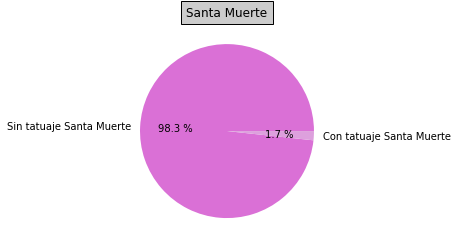

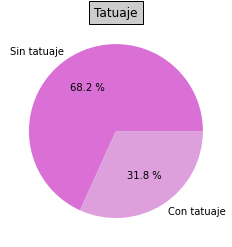

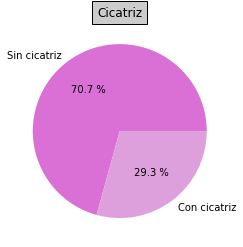

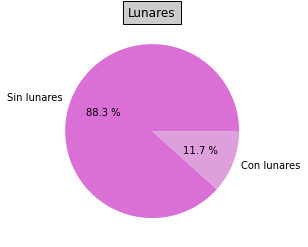

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

In [ ]:
#Tatuaje de la Santa Muerte
mylabels = ["Sin tatuaje Santa Muerte", "Con tatuaje Santa Muerte"]
colors = ['#da70d6','#dda0dd']
plt.pie(jalisco_df["Santa Muerte"].value_counts(), labels=mylabels ,colors=colors,autopct='%0.1f %%')
plt.title('Santa Muerte',bbox={'facecolor':'0.8', 'pad':5})
plt.show()

mylabels1 = ["Sin tatuaje", "Con tatuaje"]
colors = ['#da70d6','#dda0dd']
plt.pie(jalisco_df["Tatuaje"].value_counts(), labels=mylabels1 ,colors=colors,autopct='%0.1f %%')
plt.title('Tatuaje',bbox={'facecolor':'0.8', 'pad':5})
plt.show()

mylabels2 = ["Sin cicatriz", "Con cicatriz"]
colors = ['#da70d6','#dda0dd']
plt.pie(jalisco_df["Cicatriz"].value_counts(), labels=mylabels2 ,colors=colors,autopct='%0.1f %%')
plt.title('Cicatriz',bbox={'facecolor':'0.8', 'pad':5})
plt.show()

mylabels3 = ["Sin lunares", "Con lunares"]
colors = ['#da70d6','#dda0dd']
plt.pie(jalisco_df["Lunares"].value_counts(), labels=mylabels3 ,colors=colors,autopct='%0.1f %%')
plt.title('Lunares',bbox={'facecolor':'0.8', 'pad':5})
plt.show()

plt.figure(figsize=(14,10))

# Preparación del conjunto de datos para agrupamiento

In [ ]:
jalisco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3362 entries, 523 to 36243
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Municipio                             3362 non-null   object        
 1   Nacionalidad                          3359 non-null   object        
 2   Estatura                              3362 non-null   float64       
 3   Complexion                            3220 non-null   object        
 4   Sexo                                  3362 non-null   object        
 5   Edad                                  3362 non-null   float64       
 6   Dependencia que envio la informacion  3362 non-null   object        
 7   Fecha_hora                            3361 non-null   datetime64[ns]
 8   Rango de Edad                         3362 non-null   object        
 9   Dia                                   3361 non-null   float64       
 1

In [ ]:
#A continuación se le asigna un valor numérico a todas las columnas que son de tipo object
encoder = LabelEncoder()

#Como solo se pueden convertir valores tipo str, se cambian las columnas tipo object a string
jalisco_df["Municipio"] = jalisco_df["Municipio"].astype(str)
jalisco_df["Nacionalidad"] = jalisco_df["Nacionalidad"].astype(str)
jalisco_df["Rango de Edad"] = jalisco_df["Rango de Edad"].astype(str)

#Se le asigna valor numérico a cada variable que se encuentra dentro de las columnas
jalisco_df['Municipio'] = encoder.fit_transform(jalisco_df['Municipio'])
jalisco_df['Nacionalidad'] = encoder.fit_transform(jalisco_df['Nacionalidad'])
jalisco_df['Rango de Edad'] = encoder.fit_transform(jalisco_df['Rango de Edad'])
jalisco_df

,Municipio,Nacionalidad,Estatura,Complexion,Sexo,Edad,Dependencia que envio la informacion,Fecha_hora,Rango de Edad,Dia,Mes,Año,Santa Muerte,Tatuaje,Cicatriz,Lunares
523,110,8,165.0,DELGADA,HOMBRE,21.0,FGE - DURANGO,2006-01-01 12:00:00,3,1.0,1.0,2006.0,0.0,0.0,1.0,0.0
1416,34,8,170.0,ROBUSTA,HOMBRE,23.0,FGE - PUEBLA,2011-07-28 03:00:00,3,28.0,7.0,2011.0,0.0,0.0,0.0,0.0
4276,103,8,180.0,ROBUSTA,HOMBRE,25.0,FGE - JALISCO,2012-08-08 08:00:00,4,8.0,8.0,2012.0,1.0,1.0,0.0,0.0
4277,52,8,171.0,DELGADA,HOMBRE,27.0,FGE - JALISCO,2012-08-07 10:30:00,4,7.0,8.0,2012.0,0.0,0.0,0.0,0.0
4278,52,8,175.0,DELGADA,HOMBRE,28.0,FGE - JALISCO,2012-08-07 09:00:00,4,7.0,8.0,2012.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36187,93,8,175.0,MEDIANA,HOMBRE,39.0,FGE - JALISCO,2017-08-10 09:00:00,6,10.0,8.0,2017.0,0.0,1.0,0.0,1.0
36192,110,8,165.0,ROBUSTA,HOMBRE,24.0,FGE - JALISCO,2017-09-25 09:30:00,3,25.0,9.0,2017.0,0.0,1.0,1.0,0.0
36239,5,8,165.0,DELGADA,HOMBRE,32.0,FGE - JALISCO,2017-11-17 11:00:00,5,17.0,11.0,2017.0,0.0,1.0,1.0,0.0
36240,85,8,175.0,MEDIANA,HOMBRE,48.0,FGE - JALISCO,2017-09-23 05:00:00,7,23.0,9.0,2017.0,0.0,0.0,0.0,0.0


In [ ]:
#Se eliminan los datos que no se usarán para el agrupamiento
jalisco_df=jalisco_df.drop(['Edad'], axis=1) #Se elimina la edad debido a que ya tenemos la columna "Rango de Edad" la cual tiene menos grupos
jalisco_df=jalisco_df.drop(['Dependencia que envio la informacion'], axis=1) #Se elimina debido a que la dependencia que envió la información no afectará en las desapariciones de individuos
jalisco_df=jalisco_df.drop(['Fecha_hora'], axis=1) #Debido a que ya se separó la fecha por día, mes y año. La hora por otra parte, fue mal capturada por el gobierno mexicano y por lo tanto los datos erróneos no nos dicen nada
jalisco_df=jalisco_df.drop(['Año'], axis=1) #Como estos individuos ya están desaparecidos, no nos sirve de nada el año para ver las características que tienen en común las personas desaparecidas para observar qué tipo de persona es más probable de desaparecer

In [ ]:
#Sexo
#Se cambia a valor numérico el sexo
jalisco_df.loc[(jalisco_df["Sexo"].str.contains("MUJER", na=False, case=False)), 
                "Sexo"]= 1
jalisco_df.loc[(jalisco_df["Sexo"].str.contains("HOMBRE", na=False, case=False)), 
                "Sexo"]= 2

In [ ]:
#Se llenan los valores faltantes con 0
jalisco_df["Sexo"]=jalisco_df["Sexo"].fillna(0)

In [ ]:
#Se cambia a valor numérico la complexión
#Complexion
jalisco_df.loc[(jalisco_df["Complexion"].str.contains("DELGADA", na=False, case=False)), 
                "Complexion"]= 1
jalisco_df.loc[(jalisco_df["Complexion"].str.contains("ROBUSTA", na=False, case=False)), 
                "Complexion"]= 2
jalisco_df.loc[(jalisco_df["Complexion"].str.contains("MEDIANA", na=False, case=False)), 
                "Complexion"]= 3
jalisco_df.loc[(jalisco_df["Complexion"].str.contains("OBESA", na=False,case=False)), 
                "Complexion"]= 4

jalisco_df["Complexion"]=jalisco_df["Complexion"].fillna(0)

In [ ]:
jalisco_df

,Municipio,Nacionalidad,Estatura,Complexion,Sexo,Rango de Edad,Dia,Mes,Santa Muerte,Tatuaje,Cicatriz,Lunares
523,110,8,165.0,1,2,3,1.0,1.0,0.0,0.0,1.0,0.0
1416,34,8,170.0,2,2,3,28.0,7.0,0.0,0.0,0.0,0.0
4276,103,8,180.0,2,2,4,8.0,8.0,1.0,1.0,0.0,0.0
4277,52,8,171.0,1,2,4,7.0,8.0,0.0,0.0,0.0,0.0
4278,52,8,175.0,1,2,4,7.0,8.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
36187,93,8,175.0,3,2,6,10.0,8.0,0.0,1.0,0.0,1.0
36192,110,8,165.0,2,2,3,25.0,9.0,0.0,1.0,1.0,0.0
36239,5,8,165.0,1,2,5,17.0,11.0,0.0,1.0,1.0,0.0
36240,85,8,175.0,3,2,7,23.0,9.0,0.0,0.0,0.0,0.0


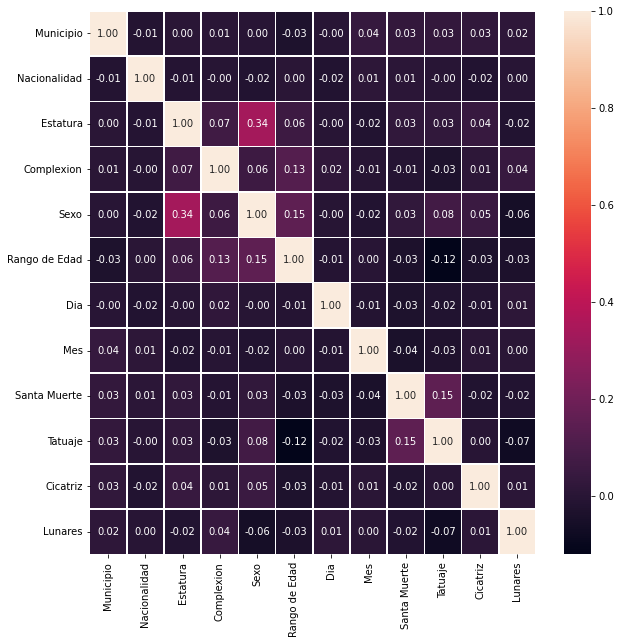

In [ ]:
#Se analiza la correlación de las variables
jalisco_df.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(jalisco_df.corr(), annot=True, fmt='.2f',linewidths=.5, ax=ax)

# Agrupamiento

##Se realiza el método del codo para encontrar el número de clusters ideal para realizar el agrupamiento

In [ ]:
data_clust = jalisco_df
data_clust['Dia']=data_clust['Dia'].fillna(0)
data_clust['Mes']=data_clust['Mes'].fillna(0)
data_clust.isna().sum()

Municipio        0
Nacionalidad     0
Estatura         0
Complexion       0
Sexo             0
Rango de Edad    0
Dia              0
Mes              0
Santa Muerte     0
Tatuaje          0
Cicatriz         0
Lunares          0
dtype: int64

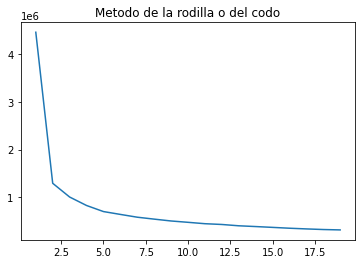

In [ ]:
#Se realiza el método del codo para encontrar cuántos clusters se necesitan para
#hacer el agrupamiento
wcss = []

for i in range(1,20):
  kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300,
                  n_init = 10, random_state = 2022)
  kmeans.fit(data_clust)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,20), wcss)
plt.title("Metodo de la rodilla o del codo")
#plt.xlabel("Numero de grupos (k)")
#plt.ylabel("WCSS")
plt.show()

In [ ]:
#Para evitar problemas, se busca exacta y numéricamente cuántos clusters son necesarios
kl = KneeLocator(range(1,20), wcss, curve="convex", direction="decreasing")
print("Elbow: ", kl.elbow)

Elbow:  3


In [ ]:
#Se encuentran los centroides de los grupos
kmeans = KMeans(n_clusters=3,init="k-means++", max_iter=300,
                n_init=10,random_state=2022)
y_kmeans = kmeans.fit(data_clust)
print(kmeans.cluster_centers_)

[[5.79402985e+01 7.95223881e+00 1.69153766e+02 1.62537313e+00
  1.89552239e+00 5.07611940e+00 1.49835821e+01 6.24328358e+00
  1.34328358e-02 3.50746269e-01 2.86567164e-01 1.01492537e-01]
 [9.86054197e+01 7.97554527e+00 1.69263836e+02 1.59616656e+00
  1.88697951e+00 5.01586252e+00 1.53734303e+01 6.57633840e+00
  2.24719101e-02 3.37739590e-01 3.09980172e-01 1.28883014e-01]
 [2.69177269e+01 7.99406277e+00 1.69118011e+02 1.58439355e+00
  1.87701442e+00 5.28668363e+00 1.54461408e+01 6.37404580e+00
  1.18744699e-02 2.73112807e-01 2.74809160e-01 1.09414758e-01]]


##Se analizan las características que tiene en común cada grupo

###Se analizan las características del grupo 0

In [ ]:
#Se encuentran los individuos pertenecientes al grupo 0
data_clust["labels"] = kmeans.labels_
data_clust.groupby("labels").get_group(0)

,Municipio,Nacionalidad,Estatura,Complexion,Sexo,Rango de Edad,Dia,Mes,Santa Muerte,Tatuaje,Cicatriz,Lunares,labels
4277,52,8,171.000000,1,2,4,7.0,8.0,0.0,0.0,0.0,0.0,0
4278,52,8,175.000000,1,2,4,7.0,8.0,0.0,0.0,1.0,0.0,0
4280,73,8,168.000000,1,2,4,10.0,7.0,0.0,0.0,1.0,0.0,0
4281,73,8,166.000000,1,2,7,10.0,7.0,0.0,0.0,1.0,0.0,0
4282,77,8,170.000000,1,2,3,14.0,6.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35743,62,8,180.000000,3,2,7,26.0,11.0,0.0,0.0,0.0,1.0,0
35809,59,8,196.000000,2,2,6,11.0,9.0,0.0,0.0,0.0,0.0,0
35817,46,8,170.508244,3,2,7,9.0,2.0,0.0,0.0,1.0,0.0,0
35910,75,8,165.000000,1,2,6,15.0,7.0,0.0,0.0,1.0,1.0,0


Se analizan que características y valores se dan más en el grupo 0

In [ ]:
grupo_0=jalisco_df[jalisco_df['labels']==0]
grupo_0['Municipio'].value_counts()
print(grupo_0['Municipio'].value_counts().to_string())

59    154
49    100
46     61
75     56
55     45
47     43
70     20
62     19
77     16
43     13
74     12
58     12
52     12
50     11
57     11
78     11
64      9
76      8
73      7
60      6
71      5
51      4
69      4
45      4
66      4
65      3
61      3
54      3
68      3
56      2
72      2
48      2
63      2
67      1
44      1
53      1


In [ ]:
grupo_0=jalisco_df[jalisco_df['labels']==0]
grupo_0['Nacionalidad'].value_counts()
print(grupo_0['Nacionalidad'].value_counts().to_string())

8     663
4       3
0       2
1       1
11      1


In [ ]:
grupo_0=jalisco_df[jalisco_df['labels']==0]
grupo_0['Estatura'].value_counts()
print(grupo_0['Estatura'].value_counts().to_string())

170.000000    158
165.000000     79
160.000000     70
175.000000     54
180.000000     50
170.508244     48
168.000000     32
172.000000     23
167.000000     14
162.000000     11
155.000000     10
158.000000     10
150.000000     10
185.000000     10
173.000000     10
176.000000      9
174.000000      8
178.000000      7
163.000000      6
190.000000      6
166.000000      5
169.000000      5
187.000000      4
154.000000      3
164.000000      3
171.000000      3
182.000000      3
153.000000      2
156.000000      2
200.000000      2
100.000000      1
184.000000      1
170.627220      1
148.000000      1
140.000000      1
179.000000      1
145.000000      1
135.000000      1
198.000000      1
183.000000      1
177.000000      1
192.000000      1
196.000000      1


In [ ]:
grupo_0=jalisco_df[jalisco_df['labels']==0]
grupo_0['Complexion'].value_counts()
print(grupo_0['Complexion'].value_counts().to_string())

1    341
2    152
3    140
0     31
4      6


In [ ]:
grupo_0=jalisco_df[jalisco_df['labels']==0]
grupo_0['Sexo'].value_counts()
print(grupo_0['Sexo'].value_counts().to_string())

2    600
1     70


In [ ]:
grupo_0=jalisco_df[jalisco_df['labels']==0]
grupo_0['Rango de Edad'].value_counts()
print(grupo_0['Rango de Edad'].value_counts().to_string())

4     134
7     132
3     107
5     104
6      99
2      50
9      15
10      9
11      8
14      5
1       3
0       2
12      1
8       1


In [ ]:
grupo_0=jalisco_df[jalisco_df['labels']==0]
grupo_0['Dia'].value_counts()
print(grupo_0['Dia'].value_counts().to_string())

1.0     34
10.0    32
23.0    32
13.0    29
15.0    29
8.0     28
17.0    26
5.0     26
4.0     26
21.0    23
14.0    22
9.0     21
26.0    21
24.0    21
16.0    21
25.0    21
12.0    20
28.0    20
29.0    20
6.0     19
2.0     19
7.0     19
30.0    19
22.0    18
11.0    18
3.0     18
20.0    17
19.0    15
18.0    15
27.0    13
31.0     7
0.0      1


In [ ]:
grupo_0=jalisco_df[jalisco_df['labels']==0]
grupo_0['Mes'].value_counts()
print(grupo_0['Mes'].value_counts().to_string())

1.0     66
8.0     64
4.0     61
6.0     59
2.0     59
12.0    56
5.0     56
7.0     54
3.0     53
9.0     53
10.0    45
11.0    43
0.0      1


In [ ]:
grupo_0=jalisco_df[jalisco_df['labels']==0]
grupo_0['Santa Muerte'].value_counts()
print(grupo_0['Santa Muerte'].value_counts().to_string())

0.0    661
1.0      9


In [ ]:
grupo_0=jalisco_df[jalisco_df['labels']==0]
grupo_0['Tatuaje'].value_counts()
print(grupo_0['Tatuaje'].value_counts().to_string())

0.0    435
1.0    235


In [ ]:
grupo_0=jalisco_df[jalisco_df['labels']==0]
grupo_0['Cicatriz'].value_counts()
print(grupo_0['Cicatriz'].value_counts().to_string())

0.0    478
1.0    192


In [ ]:
grupo_0=jalisco_df[jalisco_df['labels']==0]
grupo_0['Lunares'].value_counts()
print(grupo_0['Lunares'].value_counts().to_string())

0.0    602
1.0     68


###Se analizan las características del grupo 1

In [ ]:
#Se encuentran los individuos pertenecientes al grupo 0
data_clust["labels"] = kmeans.labels_
data_clust.groupby("labels").get_group(1)

,Municipio,Nacionalidad,Estatura,Complexion,Sexo,Rango de Edad,Dia,Mes,Santa Muerte,Tatuaje,Cicatriz,Lunares,labels
523,110,8,165.0,1,2,3,1.0,1.0,0.0,0.0,1.0,0.0,1
4276,103,8,180.0,2,2,4,8.0,8.0,1.0,1.0,0.0,0.0,1
4286,79,8,170.0,1,2,2,29.0,3.0,0.0,0.0,0.0,0.0,1
4289,103,8,180.0,1,2,7,5.0,3.0,1.0,1.0,0.0,0.0,1
4302,114,8,160.0,3,2,6,28.0,11.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36159,89,8,165.0,1,2,5,4.0,8.0,1.0,1.0,0.0,1.0,1
36187,93,8,175.0,3,2,6,10.0,8.0,0.0,1.0,0.0,1.0,1
36192,110,8,165.0,2,2,3,25.0,9.0,0.0,1.0,1.0,0.0,1
36240,85,8,175.0,3,2,7,23.0,9.0,0.0,0.0,0.0,0.0,1


Se analizan que características y valores se dan más en el grupo 0



In [ ]:
grupo_1=jalisco_df[jalisco_df['labels']==1]
grupo_1['Municipio'].value_counts()
print(grupo_1['Municipio'].value_counts().to_string())

110    530
90     257
89     211
93     154
85      90
113     37
114     30
97      21
86      18
88      15
79      13
111     12
108     11
101     11
109     10
81      10
92       9
83       8
103      8
104      5
100      5
99       5
96       5
105      5
82       5
98       5
107      4
87       3
102      3
91       3
94       2
84       2
80       2
112      2
95       1
106      1


In [ ]:
grupo_1['Nacionalidad'].value_counts()
print(grupo_1['Nacionalidad'].value_counts().to_string())

8    1502
4       3
1       2
7       2
3       1
5       1
6       1
9       1


In [ ]:
grupo_1['Estatura'].value_counts()
print(grupo_1['Estatura'].value_counts().to_string())

170.000000    296
165.000000    148
160.000000    147
175.000000    143
180.000000    120
170.508244     83
168.000000     64
185.000000     47
150.000000     43
155.000000     40
172.000000     39
162.000000     36
167.000000     32
178.000000     31
173.000000     22
176.000000     21
190.000000     21
163.000000     18
174.000000     16
169.000000     15
183.000000     11
158.000000      9
177.000000      9
182.000000      8
164.000000      8
166.000000      8
156.000000      7
186.000000      6
187.000000      6
100.000000      6
157.000000      6
145.000000      6
179.000000      5
195.000000      4
171.000000      4
120.000000      3
152.000000      3
193.000000      3
181.000000      3
192.000000      2
130.000000      2
184.000000      2
153.000000      2
188.000000      2
154.000000      2
198.000000      1
159.000000      1
146.000000      1
147.000000      1


In [ ]:
grupo_1['Complexion'].value_counts()
print(grupo_1['Complexion'].value_counts().to_string())

1    834
2    357
3    269
0     38
4     15


In [ ]:
grupo_1['Sexo'].value_counts()
print(grupo_1['Sexo'].value_counts().to_string())

2    1342
1     171


In [ ]:
grupo_1['Rango de Edad'].value_counts()
print(grupo_1['Rango de Edad'].value_counts().to_string())

7     291
4     268
3     251
5     244
6     197
2     133
9      35
1      25
10     23
13     10
11      9
12      9
14      8
8       5
0       5


In [ ]:
grupo_1['Dia'].value_counts()
print(grupo_1['Dia'].value_counts().to_string())

1.0     104
20.0     68
17.0     64
15.0     57
4.0      54
13.0     54
8.0      53
7.0      49
29.0     49
28.0     49
5.0      49
23.0     48
25.0     48
19.0     48
14.0     48
26.0     47
27.0     47
6.0      47
10.0     45
18.0     44
24.0     44
16.0     43
12.0     43
30.0     43
21.0     43
3.0      41
9.0      40
22.0     40
11.0     37
2.0      37
31.0     30


In [ ]:
grupo_1['Mes'].value_counts()
print(grupo_1['Mes'].value_counts().to_string())

5.0     184
10.0    149
9.0     138
6.0     137
8.0     134
7.0     126
1.0     122
4.0     122
11.0    120
3.0     100
12.0     93
2.0      88


In [ ]:
grupo_1['Santa Muerte'].value_counts()
print(grupo_1['Santa Muerte'].value_counts().to_string())

0.0    1479
1.0      34


In [ ]:
grupo_1['Tatuaje'].value_counts()
print(grupo_1['Tatuaje'].value_counts().to_string())

0.0    1002
1.0     511


In [ ]:
grupo_1['Cicatriz'].value_counts()
print(grupo_1['Cicatriz'].value_counts().to_string())

0.0    1044
1.0     469


In [ ]:
grupo_1['Lunares'].value_counts()
print(grupo_1['Lunares'].value_counts().to_string())

0.0    1318
1.0     195


### Se analizan las características del grupo 2

In [ ]:
#Se encuentran los individuos pertenecientes al grupo 0
data_clust["labels"] = kmeans.labels_
data_clust.groupby("labels").get_group(2)

,Municipio,Nacionalidad,Estatura,Complexion,Sexo,Rango de Edad,Dia,Mes,Santa Muerte,Tatuaje,Cicatriz,Lunares,labels
1416,34,8,170.000000,2,2,3,28.0,7.0,0.0,0.0,0.0,0.0,2
4279,16,8,180.000000,1,2,6,6.0,2.0,0.0,1.0,0.0,1.0,2
4285,12,8,150.000000,1,2,2,7.0,5.0,0.0,0.0,1.0,0.0,2
4287,12,8,170.000000,1,2,3,9.0,5.0,0.0,1.0,0.0,0.0,2
4288,12,8,170.508244,3,2,6,28.0,8.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36166,10,8,170.000000,2,2,6,1.0,2.0,0.0,0.0,1.0,0.0,2
36178,11,8,165.000000,2,2,5,21.0,9.0,0.0,1.0,0.0,0.0,2
36181,11,8,175.000000,2,2,4,21.0,9.0,0.0,1.0,0.0,0.0,2
36183,10,8,160.000000,1,2,2,20.0,12.0,0.0,0.0,0.0,0.0,2


Se analizan que características y valores se dan más en el grupo 0


In [ ]:
grupo_2=jalisco_df[jalisco_df['labels']==2]
grupo_2['Municipio'].value_counts()
print(grupo_2['Municipio'].value_counts().to_string())

34    654
10     59
8      40
29     39
19     36
11     31
5      29
14     29
27     25
4      24
40     20
38     16
16     15
30     15
12     15
2      11
39     10
22     10
20      9
1       8
3       8
41      7
31      7
24      7
26      7
42      6
32      4
28      4
13      4
37      4
17      4
0       4
9       3
18      2
21      2
35      2
23      2
33      2
25      1
15      1
7       1
6       1
36      1


In [ ]:
grupo_2['Nacionalidad'].value_counts()
print(grupo_2['Nacionalidad'].value_counts().to_string())

8     1172
11       2
4        2
2        1
10       1
7        1


In [ ]:
grupo_2['Estatura'].value_counts()
print(grupo_2['Estatura'].value_counts().to_string())

170.000000    238
165.000000    142
160.000000    125
175.000000    102
180.000000     96
170.508244     77
168.000000     61
172.000000     29
155.000000     27
185.000000     24
150.000000     24
178.000000     18
174.000000     16
167.000000     14
176.000000     13
173.000000     12
163.000000     12
190.000000     12
158.000000     11
182.000000     11
177.000000     10
162.000000     10
164.000000      8
169.000000      8
166.000000      7
157.000000      6
184.000000      5
156.000000      5
187.000000      5
183.000000      5
140.000000      4
179.000000      4
145.000000      3
154.000000      3
159.000000      3
189.000000      3
161.000000      3
153.000000      2
110.000000      2
195.000000      2
186.000000      2
194.000000      2
171.000000      2
152.000000      2
181.000000      1
135.000000      1
198.000000      1
192.000000      1
122.000000      1
148.000000      1
120.000000      1
100.000000      1
188.000000      1


In [ ]:
grupo_2['Complexion'].value_counts()
print(grupo_2['Complexion'].value_counts().to_string())

1    587
2    280
3    235
0     73
4      4


In [ ]:
grupo_2['Sexo'].value_counts()
print(grupo_2['Sexo'].value_counts().to_string())

2    1034
1     145


In [ ]:
grupo_2['Rango de Edad'].value_counts()
print(grupo_2['Rango de Edad'].value_counts().to_string())

7     281
5     194
4     185
3     156
6     152
2     101
9      37
10     19
1      13
11     12
12      9
8       8
13      6
14      4
0       2


In [ ]:
grupo_2['Dia'].value_counts()
print(grupo_2['Dia'].value_counts().to_string())

1.0     91
23.0    51
15.0    49
17.0    46
18.0    44
20.0    43
7.0     43
29.0    41
27.0    41
30.0    40
25.0    38
4.0     38
22.0    37
5.0     35
12.0    35
6.0     35
10.0    35
28.0    35
21.0    34
2.0     34
19.0    34
14.0    34
11.0    33
8.0     31
26.0    31
9.0     31
3.0     30
24.0    30
13.0    30
16.0    28
31.0    22


In [ ]:
grupo_2['Mes'].value_counts()
print(grupo_2['Mes'].value_counts().to_string())

3.0     121
5.0     104
10.0    104
7.0     102
2.0     102
9.0     102
4.0     100
8.0      98
11.0     97
6.0      95
1.0      83
12.0     71


In [ ]:
grupo_2['Santa Muerte'].value_counts()
print(grupo_2['Santa Muerte'].value_counts().to_string())

0.0    1165
1.0      14


In [ ]:
grupo_2['Tatuaje'].value_counts()
print(grupo_2['Tatuaje'].value_counts().to_string())

0.0    857
1.0    322


In [ ]:
grupo_2['Cicatriz'].value_counts()
print(grupo_2['Cicatriz'].value_counts().to_string())

0.0    855
1.0    324


In [ ]:
grupo_2['Lunares'].value_counts()
print(grupo_2['Lunares'].value_counts().to_string())

0.0    1050
1.0     129


## Se realiza el agrupamiento

In [ ]:
X = StandardScaler().fit_transform(data_clust)
pca = PCA(n_components = 3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponents, columns=["CP1","CP2","CP3"])
principalDf["labels"] = kmeans.labels_
principalDf

,CP1,CP2,CP3,labels
0,1.108900,0.427060,0.307614,1
1,-1.505974,-0.138290,0.056659,2
2,2.341110,-1.164537,4.576372,1
3,0.747615,0.192668,-0.049146,0
4,0.947641,-0.281182,-0.087301,0
...,...,...,...,...
3357,0.959898,-0.718967,-0.686882,1
3358,1.510610,0.177596,0.504115,1
3359,-1.554721,-0.177590,1.374310,2
3360,0.316317,-1.151722,-1.458419,1


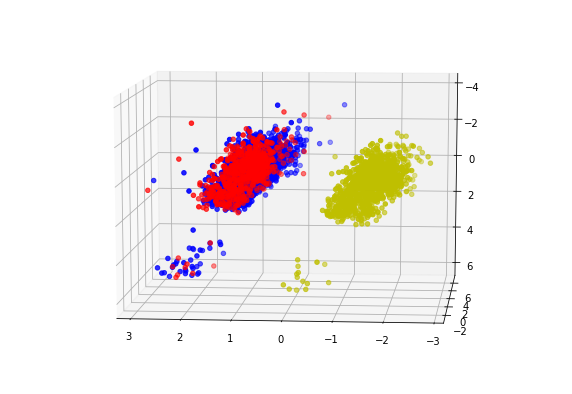

In [ ]:
#Se grafica el agrupamiento de manera tridimensional para poder observar claramente cómo se separan los grupos
cluster_0 = principalDf[principalDf["labels"] == 0]
cluster_1 = principalDf[principalDf["labels"] == 1]
cluster_2 = principalDf[principalDf["labels"] == 2]

x_0 = cluster_0["CP1"]
y_0 = cluster_0["CP2"]
z_0 = cluster_0["CP3"]

x_1 = cluster_1["CP1"]
y_1 = cluster_1["CP2"]
z_1 = cluster_1["CP3"]

x_2 = cluster_2["CP1"]
y_2 = cluster_2["CP2"]
z_2 = cluster_2["CP3"]

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

 
# Creating plot
ax.scatter3D(x_0, y_0,z_0, c='r', marker='o')
ax.scatter3D(x_1, y_1,z_1, c='b', marker='o')
ax.scatter3D(x_2, y_2,z_2, c='y', marker='o')

ax.view_init(-170,85)
plt.show()


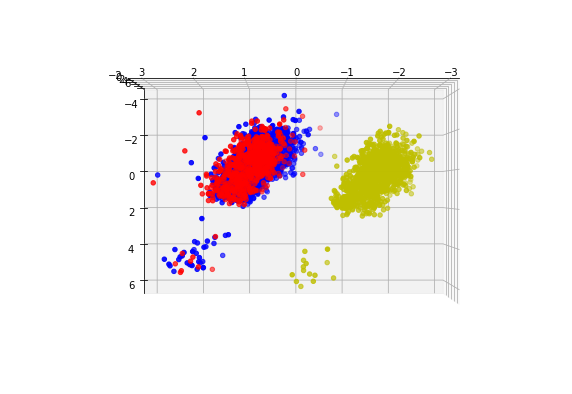

In [ ]:
#Se ve la gráfica desde otro ángulo
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(x_0, y_0,z_0, c='r', marker='o')
ax.scatter3D(x_1, y_1,z_1, c='b', marker='o')
ax.scatter3D(x_2, y_2,z_2, c='y', marker='o')
ax.view_init(360, 270)

plt.show()

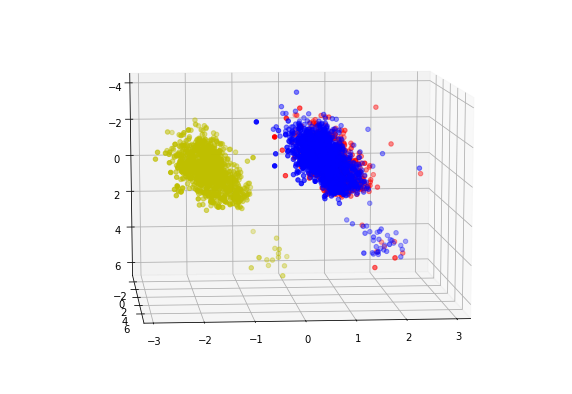

In [ ]:
#Se ve la gráfica desde otro ángulo
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(x_0, y_0,z_0, c='r', marker='o')
ax.scatter3D(x_1, y_1,z_1, c='b', marker='o')
ax.scatter3D(x_2, y_2,z_2, c='y', marker='o')
ax.view_init(-170, -85)

plt.show()

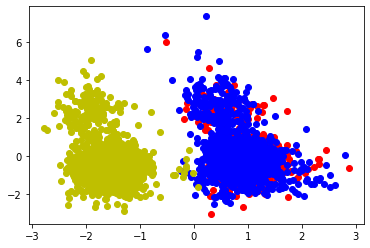

In [ ]:
#Se observa la gráfica desde frente
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

cluster_0 = principalDf[principalDf["labels"] == 0]
cluster_1 = principalDf[principalDf["labels"] == 1]
cluster_2 = principalDf[principalDf["labels"] == 2]

x_0 = cluster_0["CP1"]
y_0 = cluster_0["CP2"]

x_1 = cluster_1["CP1"]
y_1 = cluster_1["CP2"]

x_2 = cluster_2["CP1"]
y_2 = cluster_2["CP2"]

ax.scatter(x_0, y_0, c='r', marker='o')
ax.scatter(x_1, y_1, c='b', marker='o')
ax.scatter(x_2, y_2, c='y', marker='o')

plt.show()